In [11]:
"""
Isointensity phase-gradient delays (at isolated frequencies)

Author: havlajos
Created: 29/11/2022
Last Update: 11/07/2023

Description: Script obtaining frequency location of the basilar membrane transfer function for the reference nonlinear cochlear model OAE data.
"""

import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *

# data loading - ! CHOOSE !
FILENAME = 'data/isoint/isoint_2kHz_Level_20dB_TM45130.mat'
mat = scipy.io.loadmat(FILENAME)

# NOT EVENLY SPACED!!!
fvect = mat['frekax'].flatten()  # frequency axis
Y = mat['Y'].flatten() # BM deviation
Yme = mat['Yme'].flatten() # stapes deviation
transfer_fcn = Y/Yme
# frequency location of global maximum
maximum = findGlobalMaximum(np.real(20*np.log10(np.abs(transfer_fcn))))

freq_range = np.size(fvect)  # maximum index on the frequency axis


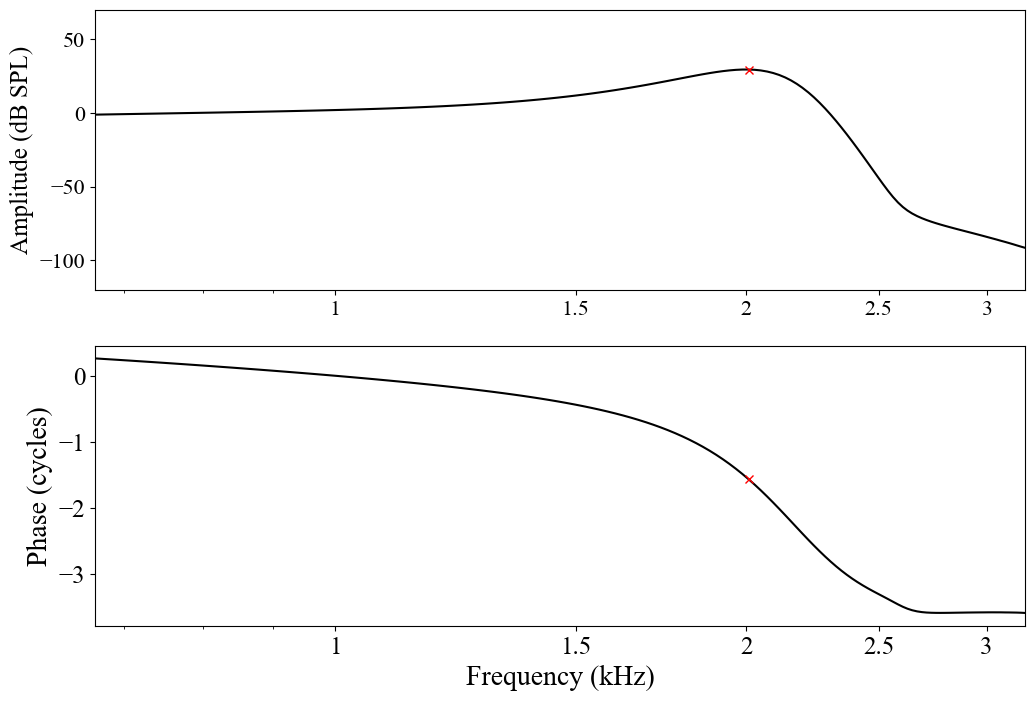

In [13]:
from matplotlib.ticker import FixedLocator, FixedFormatter

# sound wave in decibels
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), nrows=2)
ax1.plot(fvect/1000, 20*np.log10(np.abs(transfer_fcn)), 'k', label='BM transfer function')

ax1.plot(fvect[maximum]/1000, 20 *
        np.log10(np.abs(transfer_fcn)[maximum]), "rx", label='global maximum')

ax1.set_xscale('log')

x_ticks = [1, 1.5, 2, 2.5, 3, 3.5]
ax1.xaxis.set_major_locator(FixedLocator(x_ticks))
ax1.xaxis.set_major_formatter(FixedFormatter(x_ticks))
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_xlim([fvect[0]/1000, fvect[-1]/1000])
ax1.set_ylim([-120, 70])
ax1.set_ylabel('Amplitude (dB SPL)', fontdict={"fontsize": 18})

ax2.plot(fvect/1000, np.unwrap(np.angle(transfer_fcn))/(2*np.pi),
         'k', label='Phase')

ax2.plot(fvect[maximum]/1000,
         np.unwrap(np.angle(transfer_fcn))[maximum]/(2*np.pi), "rx", label='global maximum')

ax2.set_xscale('log')

ax2.xaxis.set_major_locator(FixedLocator(x_ticks))
ax2.xaxis.set_major_formatter(FixedFormatter(x_ticks))
ax2.tick_params(axis='both', which='major', labelsize=18)

ax2.set_xlim([fvect[0]/1000, fvect[-1]/1000])
ax2.set_xlabel('Frequency (kHz)', fontdict={"fontsize": 20})
ax2.set_ylabel('Phase (cycles)', fontdict={"fontsize": 20})

plt.rcParams['font.family'] = 'Times New Roman'
# plt.savefig("ref_isoint.png", dpi=300)
plt.show()
